<a href="https://colab.research.google.com/github/Felipe-Pinto/python_para_exatas/blob/main/BS_Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sympy import *
from sympy.stats import *
X = Normal("X", 0, 1)
S = Symbol('S')

In [2]:
init_printing(pretty_print = True)

In [3]:
def BlackScholes(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (log(S/K) + (r + sigma**2/2)*T)/(sigma*sqrt(T))
    d2 = d1 - sigma*sqrt(T)
    try:
        if type == "c":
            price = price = S*N(P(X<=d1)) - K*exp(-r*T)*N(P(X<=d2))
        elif type == "p":
            price = K*exp(-r*T)*N(P(X<=-d2)) - S*N(P(X<=-d1))
        return price
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [4]:
def delta(r, S, K, T, sigma, type="c"):
    "Calculate delta of an option"
    d1 = (log(S/K) + (r + sigma**2/2)*T)/(sigma*sqrt(T))
    try:
         if type == "c":
            delta = N(P(X <= d1))
         elif type == "p":
            delta = -N(P(X <= d1))
         return delta
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [5]:
def gamma(r, S, K, T, sigma, type="c"):
    "Calculate gamma of a option"
    d1 = (log(S/K) + (r + sigma**2/2)*T)/(sigma*sqrt(T))
    d2 = d1 - sigma*sqrt(T)
    try:
        gamma = N(P(X <= d1))/(S*sigma*np.sqrt(T))
        return gamma
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [6]:
def vega(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (log(S/K) + (r + sigma**2/2)*T)/(sigma*sqrt(T))
    d2 = d1 - sigma*sqrt(T)
    try:
        vega = S*N(P(X <= d1))*sqrt(T)
        return vega*0.01
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [7]:
def theta(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (log(S/K) + (r + sigma**2/2)*T)/(sigma*sqrt(T))
    d2 = d1 - sigma*sqrt(T)
    try:
        if type == "c":
            theta = -S*N(P(X <= d1))*sigma/(2*sqrt(T)) - r*K*exp(-r*T)*N(P(X <= d2))
        elif type == "p":
            theta = -S*N(P(X <= d1))*sigma/(2*sqrt(T)) + r*K*exp(-r*T)*N(P(X <= -d2))
        return theta/365
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [8]:
def rho(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (log(S/K) + (r + sigma**2/2)*T)/(sigma*sqrt(T))
    d2 = d1 - sigma*sqrt(T)
    try:
        if type == "c":
            rho = K*T*exp(-r*T)*N(P(X <= d2))
        elif type == "p":
            rho = -K*T*exp(-r*T)*N(P(X <= -d2))
        return rho*0.01
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")


In [9]:
r = 0.125       # Interest tax
#S = 97          # Stock
#S = Symbol('S')
K = 100         # Stirke
#T = 1/252      # Time to end
T = 0.2/252
sigma = 0.60    # Volatility
type="c"

In [10]:
BS = BlackScholes(r, S, K, T, sigma, type="c")

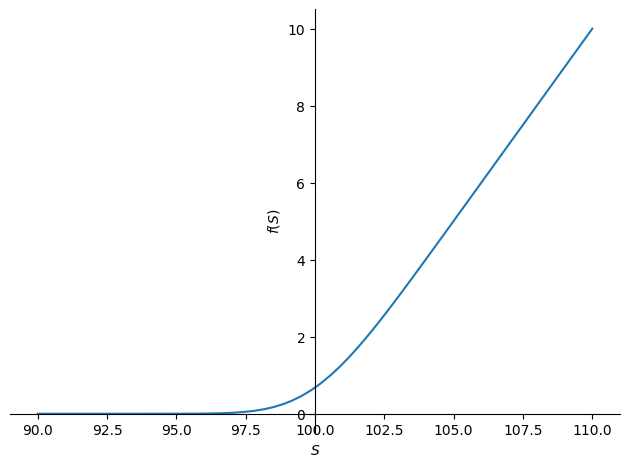

In [11]:
plot(BS, (S, 90, 110))

In [12]:
Ti = [20/252,10/252,3.0/252,0.1/252]
BS1 = BlackScholes(r, S, K, Ti[0], sigma, type="c")
BS2 = BlackScholes(r, S, K, Ti[1], sigma, type="c")
BS3 = BlackScholes(r, S, K, Ti[2], sigma, type="c")
BS4 = BlackScholes(r, S, K, Ti[3], sigma, type="c")

In [19]:
p = plot(BS1, BS2, BS3, BS4, (S, 90, 110), show=False, title='Evolução dos Prêmios no tempo', xlabel='Preços Ativo', ylabel='Valor Prêmio',  legend=True)

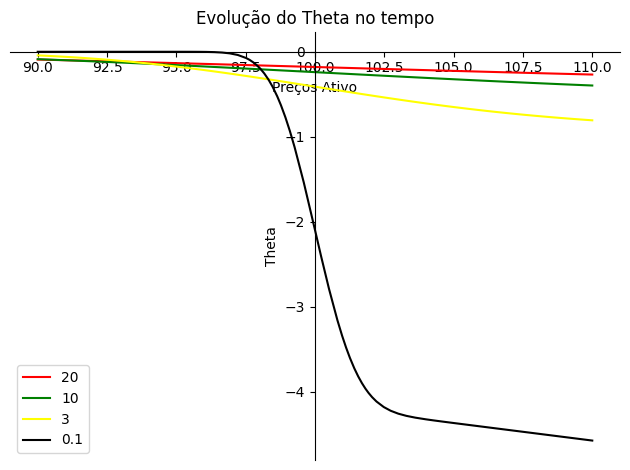

In [22]:
p[0].line_color = 'red'
p[0].label = '20'
p[1].line_color = 'green'
p[1].label = '10'
p[2].line_color = 'yellow'
p[2].label = '3'
p[3].line_color = 'black'
p[3].label = '0.1'
p.show()

In [15]:
Teta = theta(r, S, K, T, sigma, type="p")

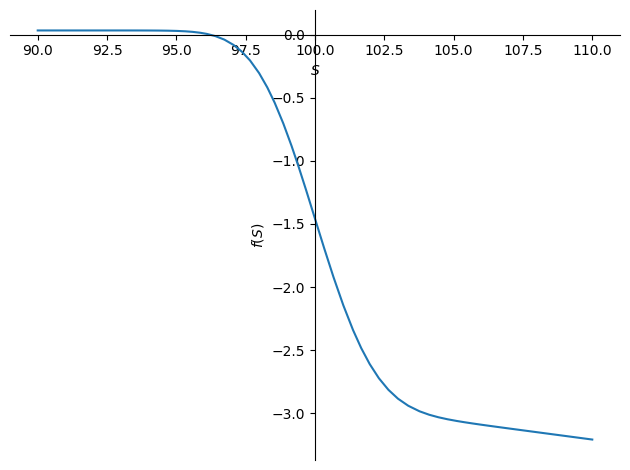

In [16]:
plot(Teta, (S, 90, 110))

In [18]:
Teta1 = theta(r, S, K, Ti[0], sigma, type="c")
Teta2 = theta(r, S, K, Ti[1], sigma, type="c")
Teta3 = theta(r, S, K, Ti[2], sigma, type="c")
Teta4 = theta(r, S, K, Ti[3], sigma, type="c")

In [21]:
p1 = plot(Teta1, Teta2, Teta3, Teta4, (S, 90, 110), show=False, title='Evolução do Theta no tempo', xlabel='Preços Ativo', ylabel='Theta',  legend=True)

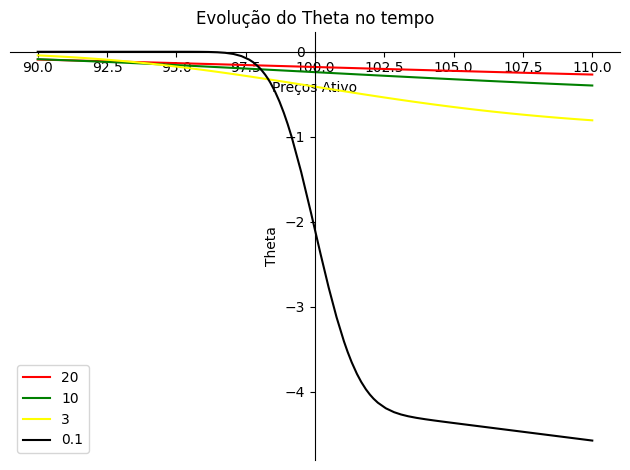

In [23]:
p1[0].line_color = 'red'
p1[0].label = '20'
p1[1].line_color = 'green'
p1[1].label = '10'
p1[2].line_color = 'yellow'
p1[2].label = '3'
p1[3].line_color = 'black'
p1[3].label = '0.1'
p1.show()